In [1]:
import os
import pandas as pd

In [2]:
s = 'https://archive.ics.uci.edu/ml/'\
    'machine-learning-databases/iris/iris.data'

In [3]:
print('From URL:', s)

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [4]:
df = pd.read_csv(s,header = None, encoding = 'utf8')

In [5]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


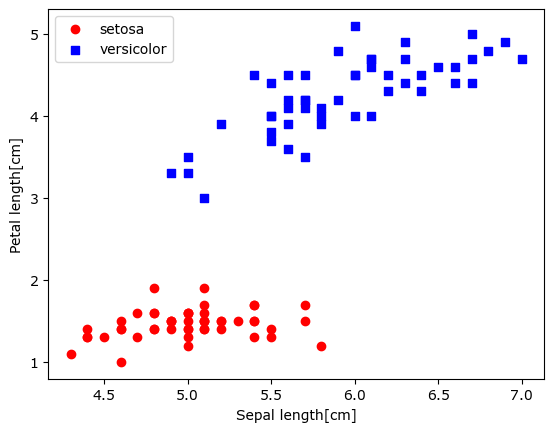

In [6]:
import matplotlib.pyplot as plt
import numpy as np
# select setosa(first 50) and versicolor (50-100)
y = df.iloc[:100,4].values
y = np.where(y == 'Iris-setosa',0,1)
# extract sepal length and petal length 0and2
X = df.iloc[:100,[0,2]].values
# plot data
plt.scatter(X[:50,0],X[:50,1],color = 'red',marker = 'o',label = 'setosa')
plt.scatter(X[50:100,0],X[50:100,1],color = 'blue',marker = 's',label = 'versicolor')
plt.xlabel('Sepal length[cm]')
plt.ylabel('Petal length[cm]')
plt.legend(loc = 0)
plt.show()

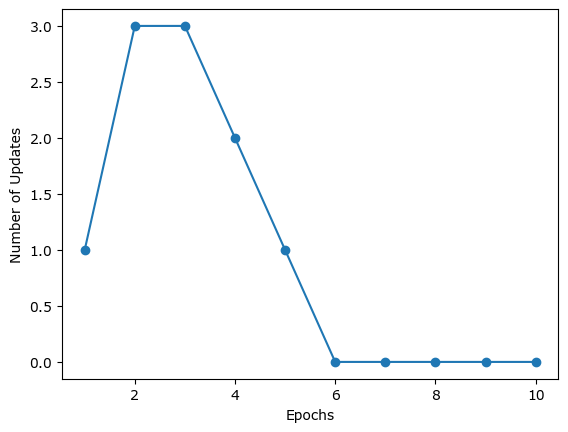

In [7]:
from Perception import *

ppn = Perception(eta = 0.1,n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_) + 1), ppn.errors_,marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of Updates')
plt.show()

In [8]:
## Decision Surface
from matplotlib.colors import ListedColormap
def plot_decision_surface(X,y,classifier,resolution = 0.02):
    # setup marker generator and color map
    markers = ('o','v','s','^','<')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min,x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    lab = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2,lab,alpha = 0.3,cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    # plot the class examples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl,0],y = X[y == cl,1],alpha = 0.8,c = colors[idx],marker = markers[idx],
                    label = f'class{cl}',edgecolor = 'black')


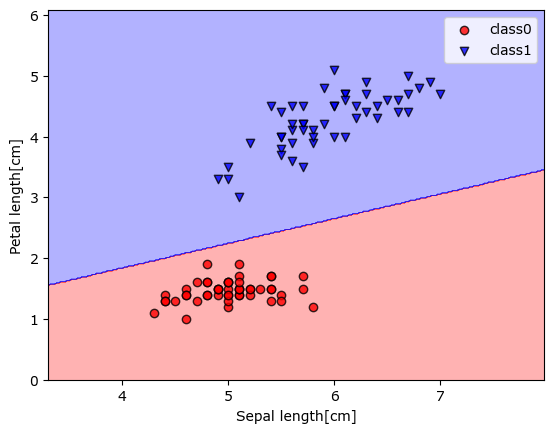

In [9]:
plot_decision_surface(X,y,classifier = ppn)
plt.xlabel('Sepal length[cm]')
plt.ylabel('Petal length[cm]')
plt.legend(loc = 0)
plt.show()

In [10]:
from AdaLine import *

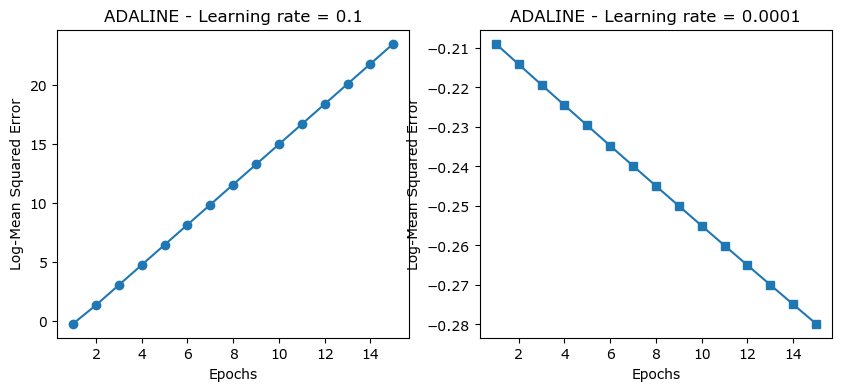

In [11]:
fig,ax = plt.subplots(1,2,figsize = (10,4))
ada1 = AdaLineGD(n_iter = 15,eta = 0.1).fit(X,y)
ax[0].plot(range(1, 1 + len(ada1.losses_)),np.log10(ada1.losses_),marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Log-Mean Squared Error')
ax[0].set_title('ADALINE - Learning rate = 0.1')

ada2 = AdaLineGD(n_iter = 15,eta = 0.0001).fit(X,y)
ax[1].plot(range(1, 1 + len(ada2.losses_)),np.log10(ada2.losses_),marker = 's')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Log-Mean Squared Error')
ax[1].set_title('ADALINE - Learning rate = 0.0001')
plt.show()

# ADALINE 学习率对训练影响 - 简短报告

## 观测
- **eta = 0.1**：对数均方误差（Log-MSE）随训练轮数上升，模型发散。
- **eta = 0.0001**：Log-MSE 缓慢下降并稳定，模型收敛但速度很慢。

## 原因
1. 学习率过大导致梯度更新过量，权重震荡或发散。
2. 学习率过小导致每次更新太微小，训练收敛缓慢。
3. 好的学习率会逐步向着最小值逼近，差的学习率则会产生之字形，跨过全局最小值
4.特征未标准化会放大学习率敏感性。

## 建议的修复与改进
- 对输入特征进行标准化（零均值、单位方差）。
- 在 0.001–0.01 区间尝试若干学习率，观察 loss 曲线。
- 增加训练轮数或使用学习率衰减（learning rate schedule）。
- 检查损失和梯度实现是否正确（符号、平均/求和等）。

## 绘图与训练示例代码
- 示例包含标准化、训练不同学习率并绘制 Log-MSE 曲线。

```python
# python
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 标准化特征
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 尝试多个学习率
etas = [0.1, 0.01, 0.001, 0.0001]
fig, axes = plt.subplots(1, len(etas), figsize=(4 * len(etas), 4))

for i, eta in enumerate(etas):
    ada = AdaLineGD(n_iter=50, eta=eta).fit(X_std, y)
    axes[i].plot(range(1, 1 + len(ada.losses_)), np.log10(ada.losses_), marker='o')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Log-Mean Squared Error')
    axes[i].set_title(f'ADALINE - eta = {eta}')

plt.tight_layout()
plt.show()

## 特征缩放改进梯度下降

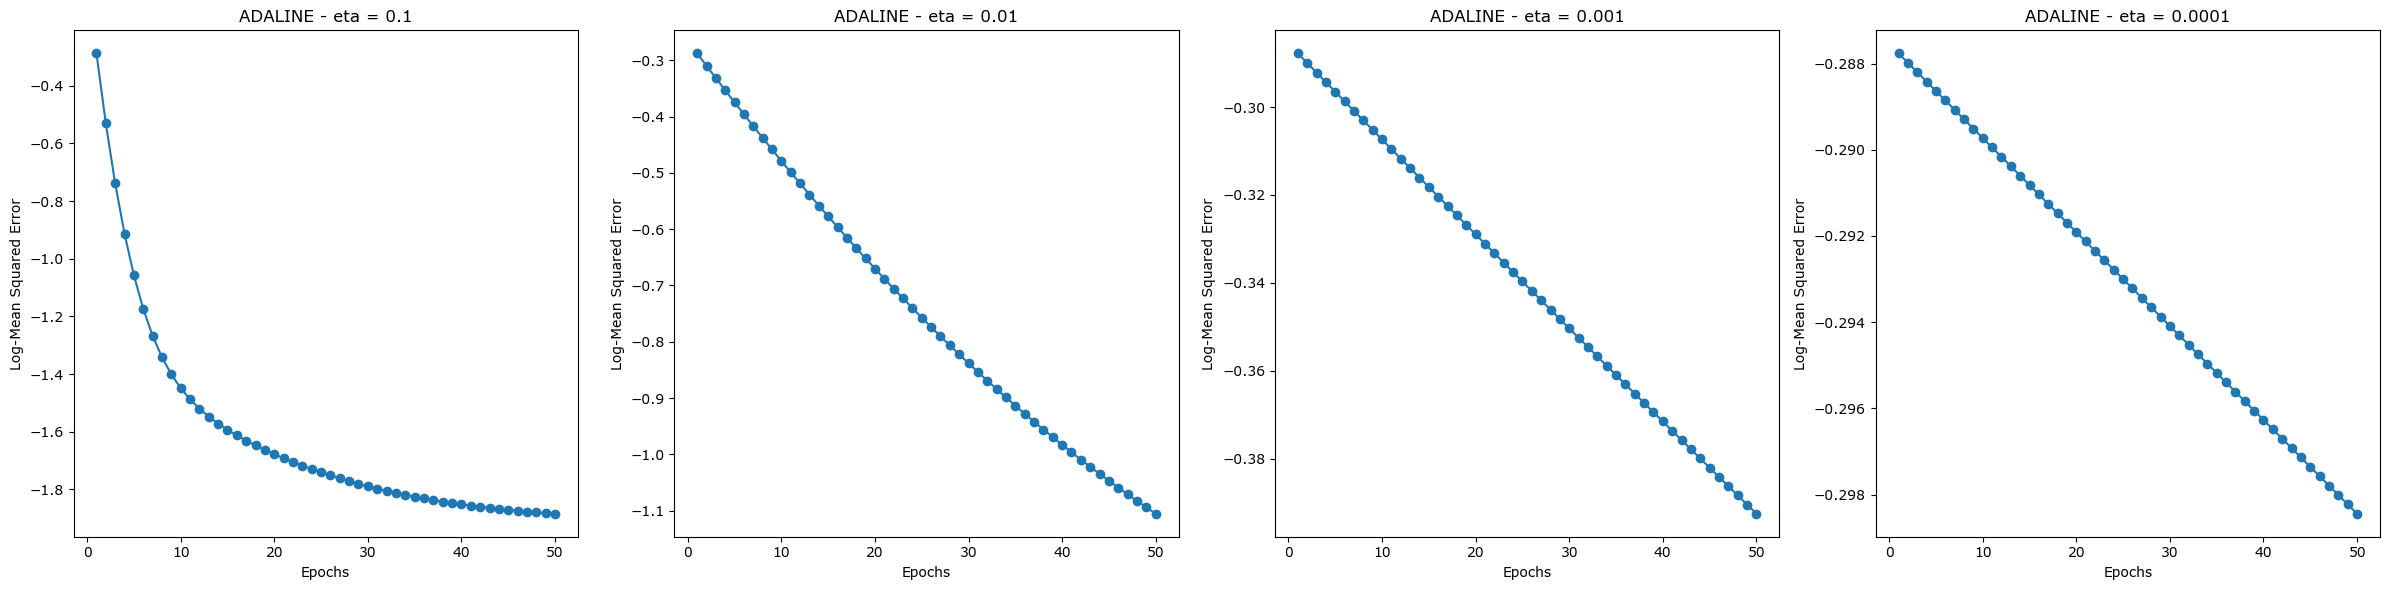

In [12]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 标准化特征
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 尝试多个学习率
etas = [0.1, 0.01, 0.001, 0.0001]
fig, axes = plt.subplots(1, len(etas), figsize=(6 * len(etas), 6))

for i, eta in enumerate(etas):
    ada = AdaLineGD(n_iter=50, eta=eta).fit(X_std, y)
    axes[i].plot(range(1, 1 + len(ada.losses_)), np.log10(ada.losses_), marker='o')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Log-Mean Squared Error')
    axes[i].set_title(f'ADALINE - eta = {eta}')

plt.tight_layout()
plt.show()

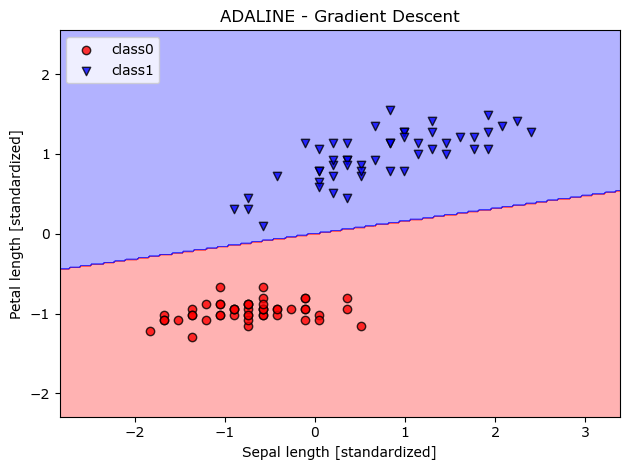

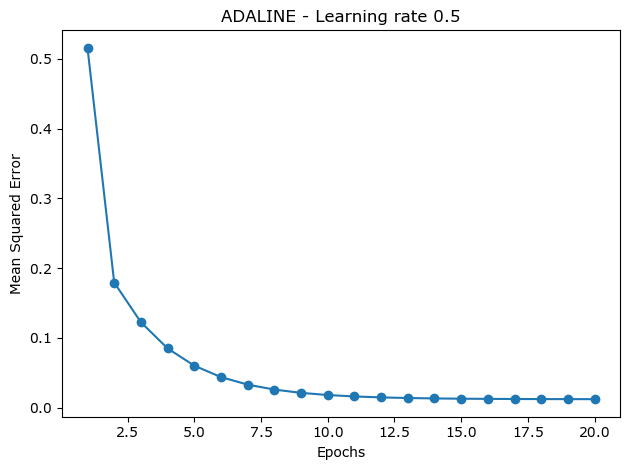

In [13]:
ada_gd = AdaLineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)
plot_decision_surface(X_std, y, classifier=ada_gd)
plt.title('ADALINE - Gradient Descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, 1 + len(ada_gd.losses_)), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('ADALINE - Learning rate 0.5')
plt.tight_layout()
plt.show()

# 大规模机器学习与随机梯度下降

- 机器学习数据集可能含有上千万条，若采用全批量梯度下降，运算成本巨大
- 随机梯度下降可以被视为全批梯度下降的一个替代法，他使用每个样本逐步更新权值：
$$\Delta w_{j} = \eta(y^{(i)} - \sigma(z^{(i)})) x_j^{(i)}$$
$$\Delta b = \eta(y^{(i)} - \sigma(z^{(i)}))$$
- 全批量梯度下降是：
$$\Delta w_{j} = \frac{2\eta}{n} \sum_{i=1}^{n} (y^{(i)} - \sigma(z^{(i)})) x_j^{(i)}$$
- 随机梯度下降更频繁地更新权重，收敛更快，但同时噪声更大，噪声大的一个优势是在采用非线性损失函数时，随机梯度下降可以更能够容易摆脱局部最小
- 为了实现SGD，重要的点在于使得样本顺序随机，同时，在每个epoch中要对所有训练样本随机乱序
- SGD还能实现在线学习的优势

# 随机梯度下降的学习率问题
- 一般采用自适应随时间变小的学习率：
$$ \eta = \frac{c_1}{(t + c_2)} $$

# 小批度下降
- 上两者的折中方案，可以理解为对训练数据的较小子集采用批梯度下降，例如每个batch = 32 or 64


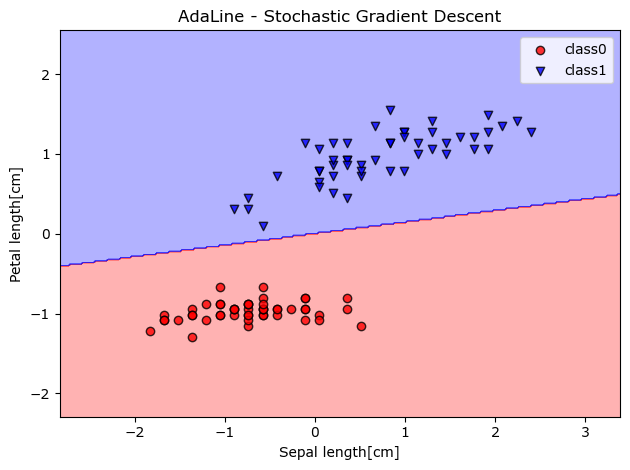

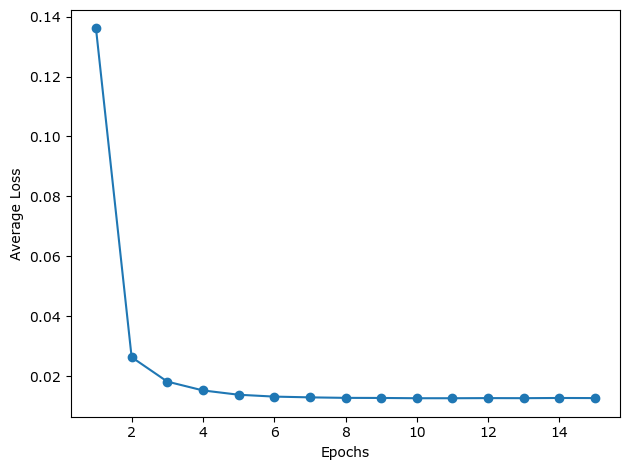

In [15]:
ada_sgd = AdaLineSGD(n_iter = 15,eta = 0.01,random_state = 824)
ada_sgd.fit(X_std,y)
plot_decision_surface(X_std,y,ada_sgd)
plt.title('AdaLine - Stochastic Gradient Descent')
plt.xlabel('Sepal length[cm]')
plt.ylabel('Petal length[cm]')
plt.legend(loc = 0)
plt.tight_layout()
plt.show()
plt.plot(range(1,1 + len(ada_sgd.losses_)),ada_sgd.losses_,marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.tight_layout()
plt.show()